## Problem Statement : 
### Forecast the CocaCola prices and prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error

import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots

### Import Data

In [2]:
cocacola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
cocacola.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


### Data Understanding

In [5]:
cocacola.shape

(42, 2)

In [6]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
cocacola.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [8]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


### Data Visualization

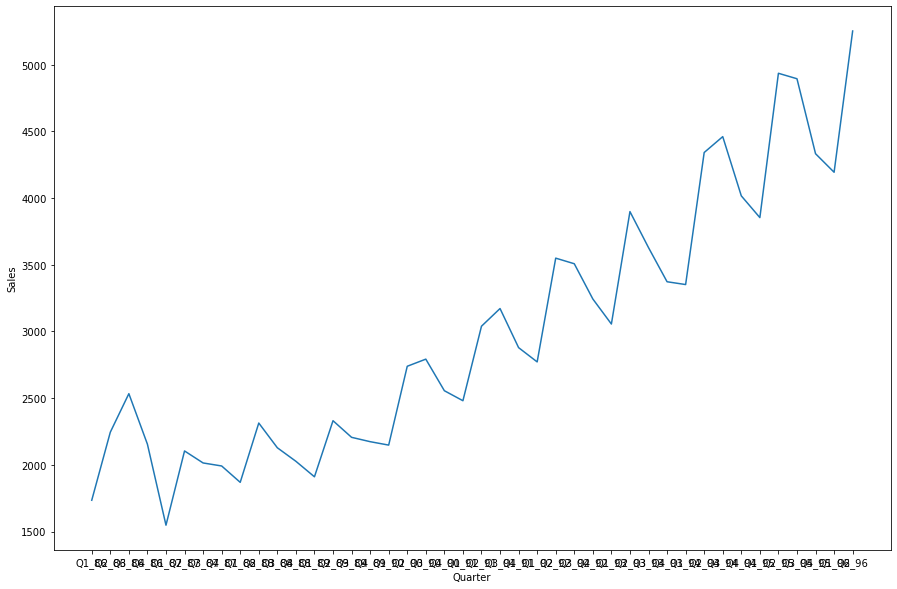

In [9]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Quarter",y="Sales",data=cocacola)
plt.show()

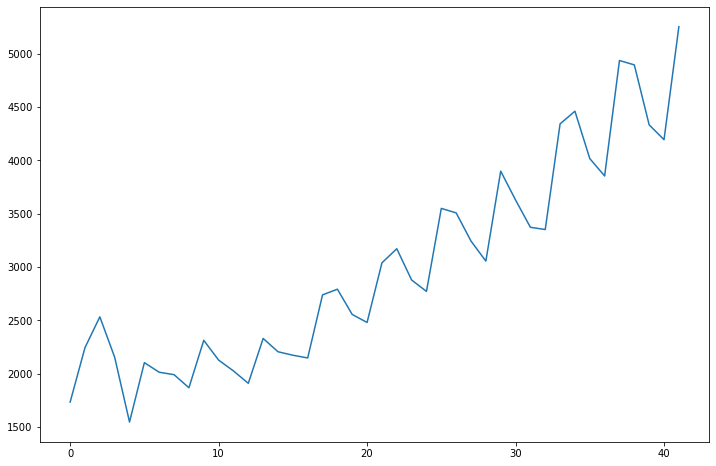

In [10]:
cocacola['Sales'].plot(figsize=(12,8))
plt.show()

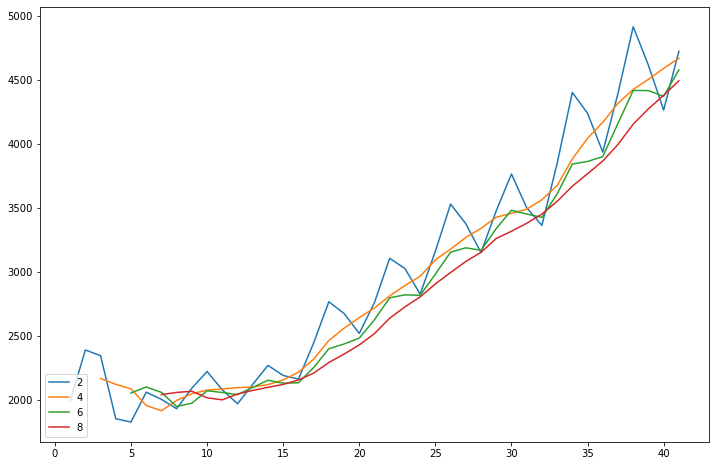

In [11]:
plt.figure(figsize=(12,8))
for i in range(2,10,2):
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)
plt.show()

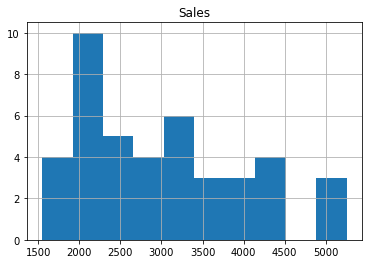

In [12]:
cocacola.hist()
pyplot.show()

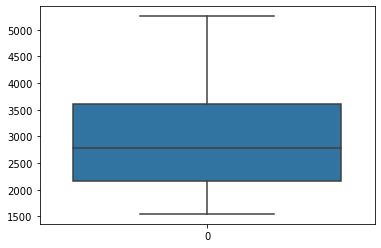

In [13]:
sns.boxplot(data=cocacola['Sales'])
plt.show()

In [14]:
quarter =['Q1','Q2','Q3','Q4']

In [15]:
p = cocacola["Quarter"][0]
p[0:2]
cocacola['quarter']= 0

for i in range(42):
    p = cocacola["Quarter"][i]
    cocacola['quarter'][i]= p[0:2]

cocacola.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [16]:
quarter_dummies = pd.DataFrame(pd.get_dummies(cocacola['quarter']))
coc = pd.concat([cocacola,quarter_dummies],axis = 1)
coc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [17]:
coc["t"] = np.arange(1,43)
coc["t_squared"] = coc["t"]*coc["t"]
coc["log_Sales"] = np.log(coc["Sales"])
coc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [18]:
coc.to_csv('Predict_new.csv')

In [19]:
Train = coc.head(30)
Test  = coc.tail(10)

### Linear

In [20]:
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  777.6287139221073


### Exponential 

In [21]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  600.089369373966


### Quadratic

In [22]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  680.2527854192869


### Additive seasonality

In [23]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  1898.3504804157517


### Additive Seasonality Quadratic

In [24]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 607.852072018353


### Multiplicative Seasonality

In [25]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)

RMSE Multiplicative Seasonality: 1951.0349399697664


### Multiplicative Additive Seasonality

In [26]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 449.4035489163238


### Testing 

In [27]:
data1 = {"MODELS":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
rmse_table = pd.DataFrame(data1)
rmse_table

,MODELS,RMSE_Values
0,rmse_linear,777.628714
1,rmse_Exp,600.089369
2,rmse_Quad,680.252785
3,rmse_add_sea,1898.350480
4,rmse_add_sea_quad,607.852072
5,rmse_Mult_sea,1951.034940
6,rmse_Mult_add_sea,449.403549


### Conclusion : Additive Seasonality Quadratic Model has the best RMSE value.
### So we forecast the dataset with Additive Seasonality Quadratic Model

In [28]:
data = [['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'],['Q2_97', 'Q2']]
print(data)
forecast = pd.DataFrame(data, columns = ['Quarter', 'quarter'])
forecast

[['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'], ['Q2_97', 'Q2']]


,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


### Create dummies and T and T-Squared columns

In [29]:
dummies = pd.DataFrame(pd.get_dummies(forecast['quarter']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,5)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

   Quarter quarter  Q1  Q2  Q3  Q4  t  t_squared
0   Q3_96      Q3   0   0   1   0  1          1
1   Q4_96      Q4   0   0   0   1  2          4
2   Q1_97      Q1   1   0   0   0  3          9
3   Q2_97      Q2   0   1   0   0  4         16


### Forecasting using Additive Seasonality Quadratic Model

In [30]:
model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=coc).fit() 
pred_new  = pd.Series(model_full.predict(forecast1))
pred_new

forecast1["forecasted_sales"] = pd.Series(pred_new)

### Final Prediction for next 4 Quarters

In [31]:
Final_predict = forecast1.loc[:, ['Quarter', 'forecasted_sales']] 
Final_predict

,Quarter,forecasted_sales
0,Q3_96,2180.858824
1,Q4_96,1851.383709
2,Q1_97,1635.419724
3,Q2_97,2284.261547


### Predict for new time period

In [32]:
predict_new = pd.read_csv('Predict_new.csv')

In [33]:
predict_new

,Unnamed: 0,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [34]:
#Build the model on entire data set
finalmodel_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=coc).fit()

In [35]:
predict_data  = pd.Series(add_sea_Quad.predict(predict_new))
predict_data

0     1776.174823
1     2284.317427
2     2222.091264
3     1963.875389
4     1712.306543
5     2243.210152
6     2203.744995
7     1968.290126
8     1739.482285
9     2293.146900
10    2276.442749
11    2063.748885
12    1857.702050
13    2434.127671
14    2440.184525
15    2250.251667
16    2066.965837
17    2666.152463
18    2694.970322
19    2527.798470
20    2367.273646
21    2989.221277
22    3040.800142
23    2896.389295
24    2758.625477
25    3403.334114
26    3477.673984
27    3356.024143
28    3241.021330
29    3908.490973
30    4005.591849
31    3906.703013
32    3814.461205
33    4504.691853
34    4624.553735
35    4548.425905
36    4478.945103
37    5191.936756
38    5334.559643
39    5281.192819
40    5234.473022
41    5970.225681
dtype: float64

In [36]:
predict_new["forecasted_Sales"] = pd.Series(predict_data)

In [37]:
predict_new.drop(['Unnamed: 0'],axis=1,inplace=True)

In [38]:
predict_new

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales,forecasted_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663,1776.174823
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443,2284.317427
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477,2222.091264
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529,1963.875389
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602,1712.306543
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791,2243.210152
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058,2203.744995
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767,1968.290126
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186,1739.482285
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574,2293.146900


## Conclusion : 
### Created a dummy variable for Quarter as quarter with Q1,Q2,Q3 and Q4. Also created a dummy variable for quarter to get the values of Q1,Q2,Q3 and Q4 respectively.

----

### Evaluation Metric MAPE ( Mean Absolute Percentage Error )

In [39]:
def MAPE(pred,org):
    temp_1 = np.abs((pred-org)/org)*100
    return np.mean(temp_1)

### Holt method 

In [40]:
from statsmodels.tsa.holtwinters import Holt

In [41]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

10.860719760551818

### Holts winter exponential smoothing with additive seasonality and additive trend

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [43]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #adds the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

8.972264802277158

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [44]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.6414315281577085

### Simple Exponential Method

In [45]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [46]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

24.90959510643747

### Final Model by combining train and test

In [47]:
hwe_model_mul_add = ExponentialSmoothing(coc["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [48]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

42    4921.534739
43    4588.042958
44    4532.469221
45    5757.270945
46    5816.228492
47    5208.774136
48    4956.696271
49    6237.978052
50    6082.667621
51    5456.276283
dtype: float64